In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/winery/train.csv
/kaggle/input/winery/test.csv


In [4]:
data = pd.read_csv('/kaggle/input/winery/train.csv')

In [6]:
country_wise = data.groupby(['country'])['price','points'].mean().reset_index().sort_values('price',ascending=False)
country_wise[['country','price']].head(n=10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,country,price
33,Switzerland,107.800000
10,England,50.706897
18,Italy,46.573810
13,Germany,43.591731
11,France,43.371654
35,US,37.462948
5,Canada,33.820809
17,Israel,33.032362
2,Austria,31.662900
29,Serbia,31.500000


## SWITZERLAND HAS REMARKABLY COSTLIER WINE THEN OTHER COUNTRIES

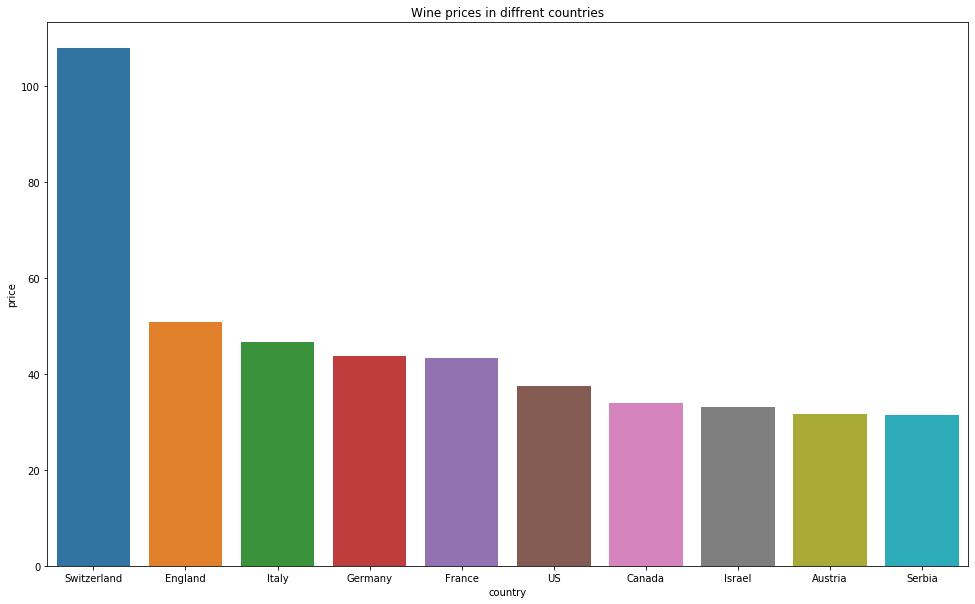

In [23]:
plt.figure(figsize = (16.5,10))
plt.title('Wine prices in diffrent countries')
sns.barplot(x = 'country', y="price", data=country_wise.head(10))
locs, labels = plt.xticks()
plt.show()

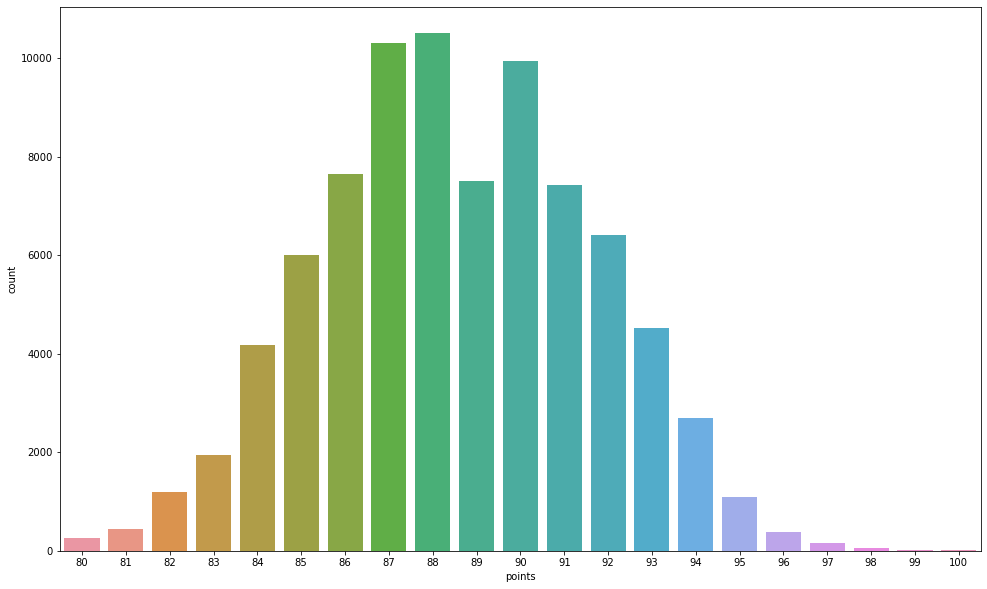

In [25]:
plt.figure(figsize = (16.5,10))
sns.countplot(data['points'])


## ALTHOUGH MOST WINES(TOP 10 WINE TYPES WITH MAX XOUNT) ARE RATED SIMILARLY, PINOT NAIR IS SLIGHTLY HIGHER RATED THAN OTHERS

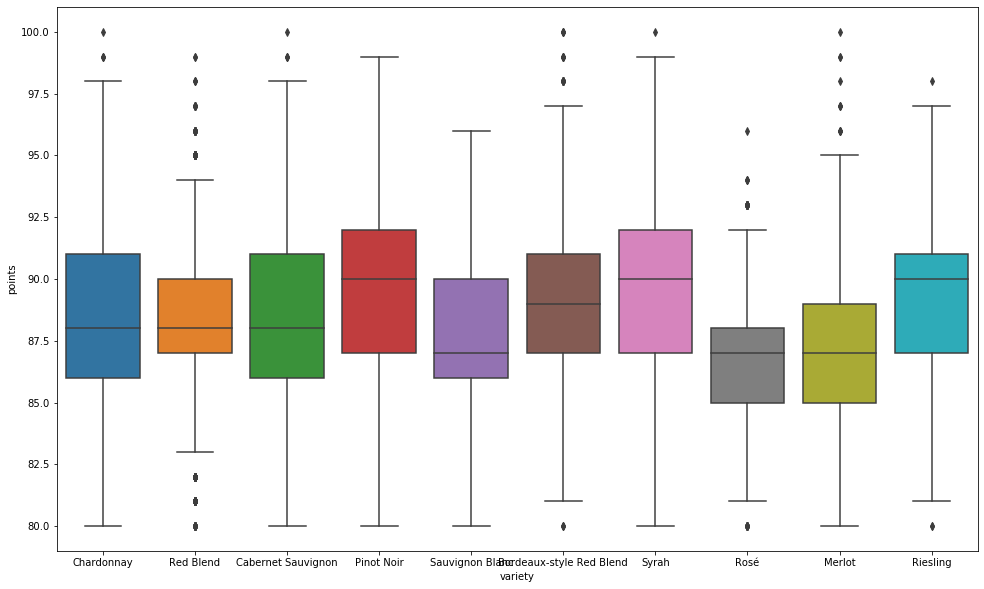

In [26]:
df = data[data.variety.isin(data.variety.value_counts().head(10).index)]
plt.figure(figsize = (16.5,10))
sns.boxplot(
    x='variety',
    y='points',
    data=df
)

## SAME PATERN CAN BE NOTICED IN PRICE DISTRIBUTION TOO, PINT NOIR IS AVERAGELLY PRICED HIGHER

(0, 300)

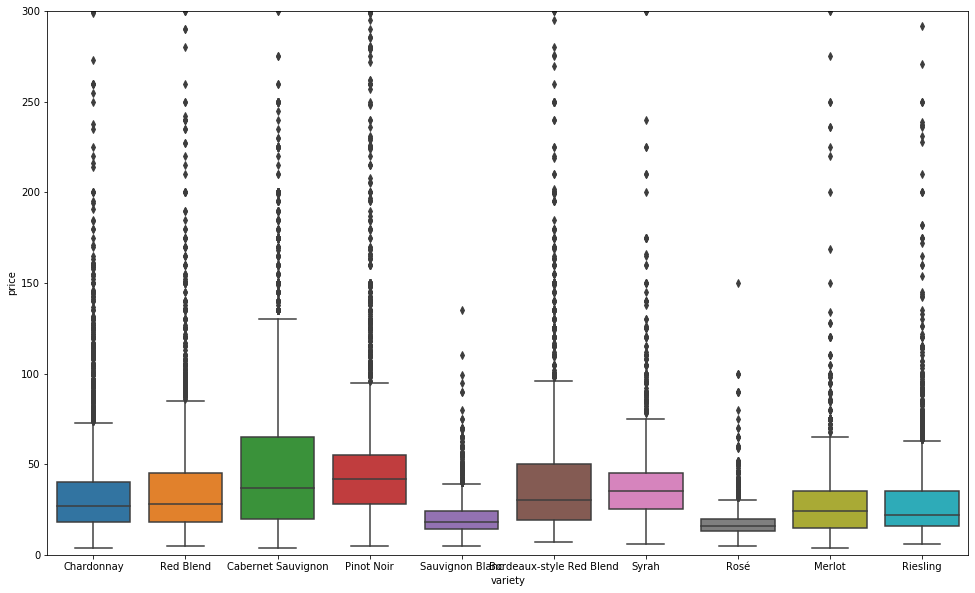

In [22]:
df = data[data.variety.isin(data.variety.value_counts().head(10).index)]
plt.figure(figsize = (16.5,10))
sns.boxplot(
    x='variety',
    y='price',
    data=df
)
plt.ylim(0, 300)

## THE REGRESSION PLOT OF POINT vs PRICE CLEARLY SHOWS THAT AS POINTS INCREASES PRICE ALSO INCREASE

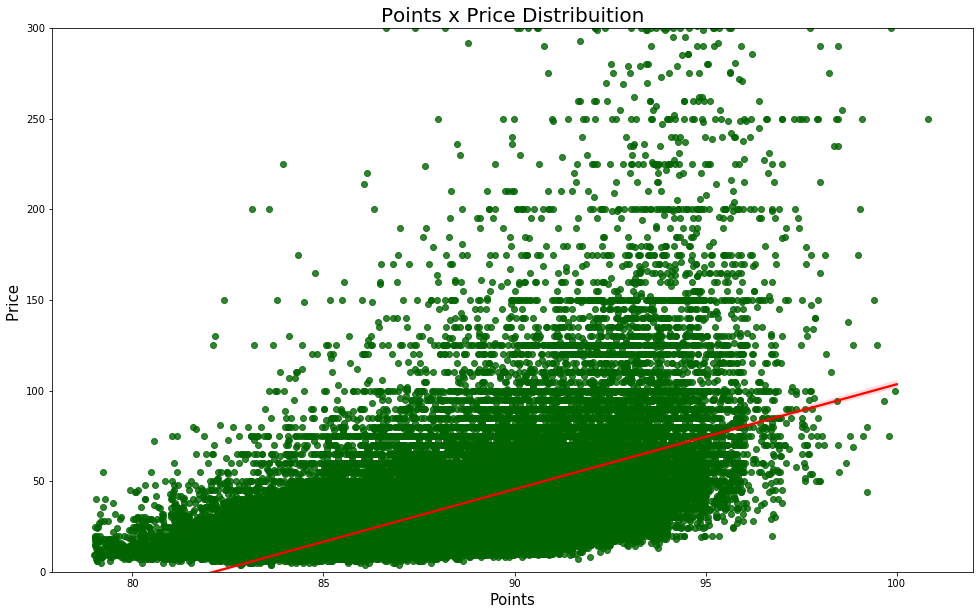

In [27]:
plt.figure(figsize=(16.5,10))

g = sns.regplot(x='points', y='price', 
                data=data, line_kws={'color':'red'},
                x_jitter=True, fit_reg=True, color='darkgreen')
g.set_title("Points x Price Distribuition", fontsize=20)
g.set_xlabel("Points", fontsize= 15)
g.set_ylabel("Price ", fontsize= 15)
plt.ylim(0, 300)

plt.show()